In [5]:
#!pip install pythae

In [1]:
import torch
import torchvision.datasets as datasets

%load_ext autoreload
%autoreload 2

In [2]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

n_samples = 200
train_dataset = mnist_trainset.data[:n_samples].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-50:].reshape(-1, 1, 28, 28) / 255.

In [3]:
from pythae.models import WAE_MMD, WAE_MMD_Config
from pythae.trainers import BaseTrainingConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_AE_MNIST, Decoder_AE_MNIST

In [7]:
config = BaseTrainingConfig(
    output_dir='my_model',
    learning_rate=1e-3,
    batch_size=200, # Set to 200 for demo purposes to speed up (default: 50)
    num_epochs=500, # Set to 500 for demo purposes. Augment this in your case to access to better generative model (default: 20000)
)


model_config = WAE_MMD_Config(
    input_dim=(1, 28, 28),
    latent_dim=10,
    kernel_choice='imq',
    reg_weight=2e-5,
    kernel_bandwidth=1
)

model = WAE_MMD(
    model_config=model_config,
    encoder=Encoder_AE_MNIST(model_config), 
    decoder=Decoder_AE_MNIST(model_config) 
)

In [8]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [9]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Preprocessing eval data...
Model passed sanity check !

Created my_model/WAE_MMD_training_2021-10-14_12-46-47. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !
Eval of epoch 1: 100%|██████████| 1/1 [00:00<00:00,  1.01batch/s]
----------------------------------------------------------------
Epoch 1: Train loss: 1099501568.0
Epoch 1: Eval loss: 1097870720.0
----------------------------------------------------------------
Eval of epoch 2: 100%|██████████| 1/1 [00:00<00:00,  1.12batch/s]
----------------------------------------------------------------
Epoch 2: Train loss: 1097941376.0
Epoch 2: Eval loss: 1096559104.0
----------------------------------------------------------------
Eval of epoch 3:   0%|          | 0/1 [00:00<?, ?batch/s]


KeyboardInterrupt: 

In [12]:
from pythae.pipelines.generation import GenerationPipeline

In [13]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = WAE_MMD.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

## Choose your sampler

In [14]:
from pythae.samplers import NormalSampler

In [15]:
normal_samper = NormalSampler(
    model=trained_model
)

In [16]:
gen_data = normal_samper.sample(
    num_samples=10
)

In [17]:
import matplotlib.pyplot as plt

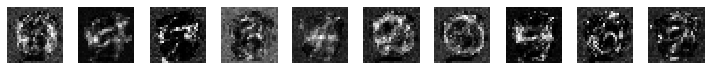

In [18]:
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for j in range(10):
        axes[j].matshow(gen_data[j, 0].detach(), cmap='gray')
        axes[j].axis('off')

plt.tight_layout(pad=0.8)